In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


## 1.Diabetes Prediction Dataset

![](https://th.bing.com/th/id/OIP.vVSn223P06R5xyxzWLZt4QHaEK?w=944&h=530&rs=1&pid=ImgDetMain.jpg)

## 2.About Dataset:
- The Diabetes Prediction dataset provides a comprehensive collection of medical and demographic information from patients, including their diabetes status (positive or negative). Key features include age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c levels, and blood glucose levels. This dataset is valuable for building machine learning models to predict the likelihood of diabetes based on a patient's medical history and demographic data. Healthcare professionals can use it to identify at-risk patients and create personalized treatment plans, while researchers can explore the relationships between various factors and diabetes development.

## 3.Import our libraries that we need it in our dataset

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 4.Export data from csv file

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


- After we makeing export to our data we see there are 100000 rows and 9 columns
- In every time we need to check if there are a null values or duolicated values an makeing action with that 

## 5.Checking type of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


![](https://thumbs.dreamstime.com/b/new-information-ribbon-isolated-band-sign-banner-189708828.jpg)

- If we see in Our Data we find some columns need convert to numeric columns
- And an extra information we see there are not null values in our columns , Every column has the same number , Any way we will checking if there are a null values or not

## 6.Null values

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- As we know from the first we do not have a null values from info order

## 7.Duplicated Values

In [6]:
df.duplicated().sum()

3854

- Afetr we are checking duplicated values we need to droped it

In [7]:
df.drop_duplicates(inplace=True)

- To make suer we are droped our values must chechking our data frame

In [8]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


![](https://aai.gov.ie/images/2019/03/13/informationforprospectiveadopters.jpg)

- As we noticed now we have 96146 rows from 100000 and 9 colmuns
- That is meaning the values was in the rows and we dropped it , The columns values stay as before

## 8.Convert Columns to numeric values

- we noticed from the first there are some columns need convert to numeric columns beacues it is an object columns
- And in this case we heve tow columns need convert
- At the first we need to see the columns content

In [9]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [10]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [11]:
df = pd.get_dummies(df,columns=['gender'],drop_first=True)

In [12]:
df = pd.get_dummies(df,columns=['smoking_history'],drop_first=True)

- After convert our columns to numeric columns we must checking our data again

In [13]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,36.0,0,0,24.60,4.8,145,0,False,False,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,False,False,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,True,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,False,False,False,False,False,True,False


- in this issue the columns number are more than before now we haveing 14 columns ( before was 9 columns ) 

## 9.Split the columns between ' x ' and ' y '

In [14]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

![](https://th.bing.com/th/id/OIP.-KUzXj-unoac7XnxPWs_gQHaED?rs=1&pid=ImgDetMain)

- we have 14 columns and this number it is big so we was useing ' Drop Way ' instand of split each column to X or Y

## 10.Split the values between train and test values

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20)

- If we notiec here we split the values 80% to train and test
- And keep 20% from the values after finshing the model train and test in his data (To test in this data)

## 11.Building the first model

In [16]:
model1 = KNeighborsClassifier(n_neighbors=7)
model1.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=7)

- In this stpe we are building model from type ' KNN ' ( K_Nearset Neighbor )

- And here we need to predict our model

In [17]:
y_pred = model1.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

- After we are building the model and makeing predict on the model we need to checking the model accuracy 

In [18]:
accuracy_score(y_test , y_pred)

0.9535621424856995

- The accuracy of model it is OK

- Checking the best K_nearest neighbor in range 10 neighbor

In [19]:
# Define the range of k values to test
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 5


- Visuleization the K

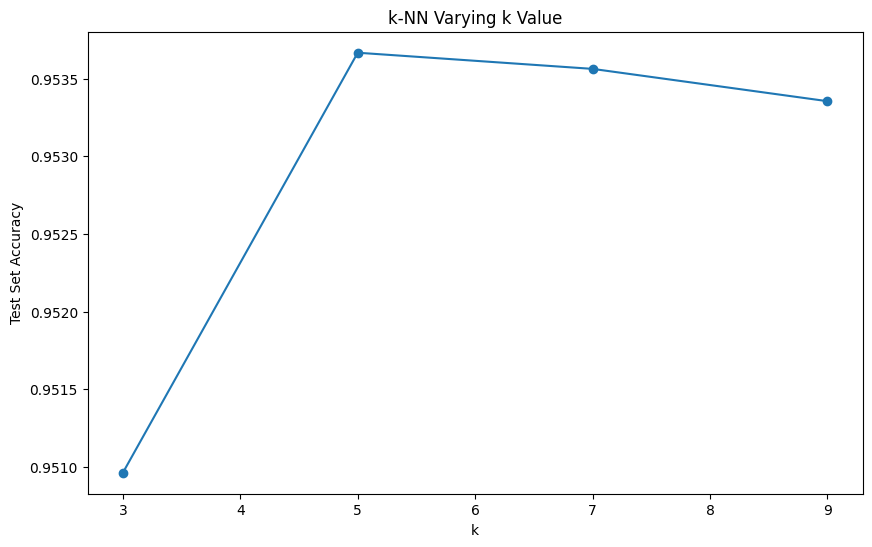

In [20]:
# Plot the k values vs. accuracy on the test set
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k Value')
plt.show()

## 12.Building the second model

In [21]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)

DecisionTreeClassifier()

- here we are building a model from type ' Decision Tree Classifier '

- To predict our second model

In [22]:
y_pred = model2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

- Checking the model accuracy after we are building it and makeing predict for this model

In [23]:
accuracy_score(y_test,y_pred)

0.9489339573582943

## 13.Building third model

In [24]:
model3 = RandomForestClassifier(criterion='entropy',n_estimators=40) 
model3.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40)

- This model we are give it the number of trees and this is makeing the model more slowed than ' Decision Tree Classifier '

- Predict our model

In [25]:
y_pred = model3.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

- Checking the model accuracy

In [26]:
accuracy_score(y_test,y_pred)

0.968278731149246

![](https://th.bing.com/th/id/R.92cc54ad370731fdc4c458391743b528?rik=sHjQAvPiMUOXxQ&pid=ImgRaw&r=0)

- If we need to save version from the best moedl was give us the best accuracy on our account kaggle we useing this library to save it

In [27]:
import pickle
 
# save
model_name = 'final_model.sav'
save_model = pickle.dump(model3,open(model_name,'wb'))
 
# load 
my_model = pickle.load(open('final_model.sav','rb'))
my_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

## 14. Improve Model by ' Gridsearch ' 

- First model

In [28]:
param_grid = {
    'n_neighbors':[1,3,5,7,9],
}

- In this step we are makeing an gridsearch on KNN model and given the model the number of neighbor

In [29]:
grid_search = GridSearchCV(
    KNeighborsClassifier() , 
    param_grid , cv=5
)

grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

- Building it 

- The best score from this model

In [30]:
grid_search.score(X_test,y_test)

0.9536661466458658

In [31]:
grid_search.best_params_

{'n_neighbors': 5}

- here the best neighbor that has number 5

- Ranking of neighbors in our data by quality

In [32]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.153638,0.001766,0.951832,0.009954,1,{'n_neighbors': 1},0.939353,0.939219,0.938309,0.940259,0.939479,0.939323,0.000623,5
1,0.154309,0.003656,1.039686,0.020846,3,{'n_neighbors': 3},0.950338,0.949490,0.950140,0.949295,0.949620,0.949776,0.000397,4
2,0.151895,0.001384,1.050991,0.001474,5,{'n_neighbors': 5},0.952613,0.953260,0.952220,0.951180,0.952415,0.952338,0.000676,1
3,0.152346,0.001558,1.081803,0.006560,7,{'n_neighbors': 7},0.953003,0.952285,0.952870,0.950790,0.952610,0.952312,0.000799,3
4,0.151780,0.001005,1.098896,0.003360,9,{'n_neighbors': 9},0.952288,0.952610,0.952805,0.950985,0.952935,0.952325,0.000704,2


- Second model

In [33]:
param_grid = {
    'n_estimators':[30,35,40],
}

- here we are given the model number trees to checking the best one

- Building gridsearch by ' Random Forest '

In [34]:
grid_search = GridSearchCV(
    RandomForestClassifier() , 
    param_grid , cv=5
)

grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [30, 35, 40]})

- The besst score from this model

In [35]:
grid_search.score(X_test,y_test)

0.9684867394695788

- The best number trees was:

In [36]:
grid_search.best_params_

{'n_estimators': 40}

- Ranking of trees in our data by quality

In [37]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.580283,0.017320,0.069243,0.000971,30,{'n_estimators': 30},0.969254,0.969317,0.968147,0.968862,0.968082,0.968732,0.000529,2
1,1.838848,0.040742,0.079645,0.001620,35,{'n_estimators': 35},0.968864,0.968992,0.968797,0.968277,0.967887,0.968563,0.000417,3
2,2.080566,0.013012,0.090419,0.001147,40,{'n_estimators': 40},0.968799,0.969252,0.968537,0.969122,0.968342,0.968810,0.000342,1


## 15.Summary:
- Several machine learning models were built and tested for quality. A method was used to improve them after construction and after evaluating their quality.